## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report
import os
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings('ignore')

## Read the own Dataset (Own data)

In [2]:
DATA_PATH='.'
data_animal=pd.read_csv(os.path.join(DATA_PATH,"data.csv"))

In [3]:
## see the dataset
data_animal.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [4]:
## get the info
data_animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [5]:
## gives the statistics 
data_animal.describe()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
count,871,871,871,871,871,871,869
unique,46,232,230,229,217,203,2
top,Buffaloes,Fever,Diarrhea,Coughing,Weight loss,Pains,Yes
freq,129,257,119,95,117,99,849


## check nan values

In [6]:
## we see that Dangerous column has nan values
data_animal.isna().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

* As data is missing from label we will drop those rows

In [7]:
data_animal = data_animal.dropna()
data_animal.shape

(869, 7)

## count plot of Dangerous column

<Axes: xlabel='Dangerous', ylabel='count'>

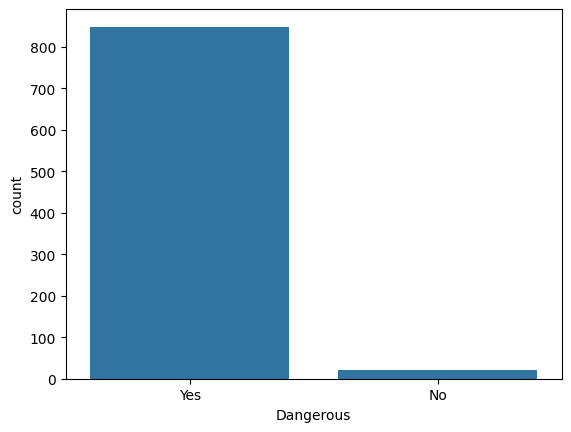

In [8]:
# plot the DangerousCounts
sns.countplot(data_animal, x="Dangerous")

## count plot of AnimalName column

<Axes: xlabel='AnimalName', ylabel='count'>

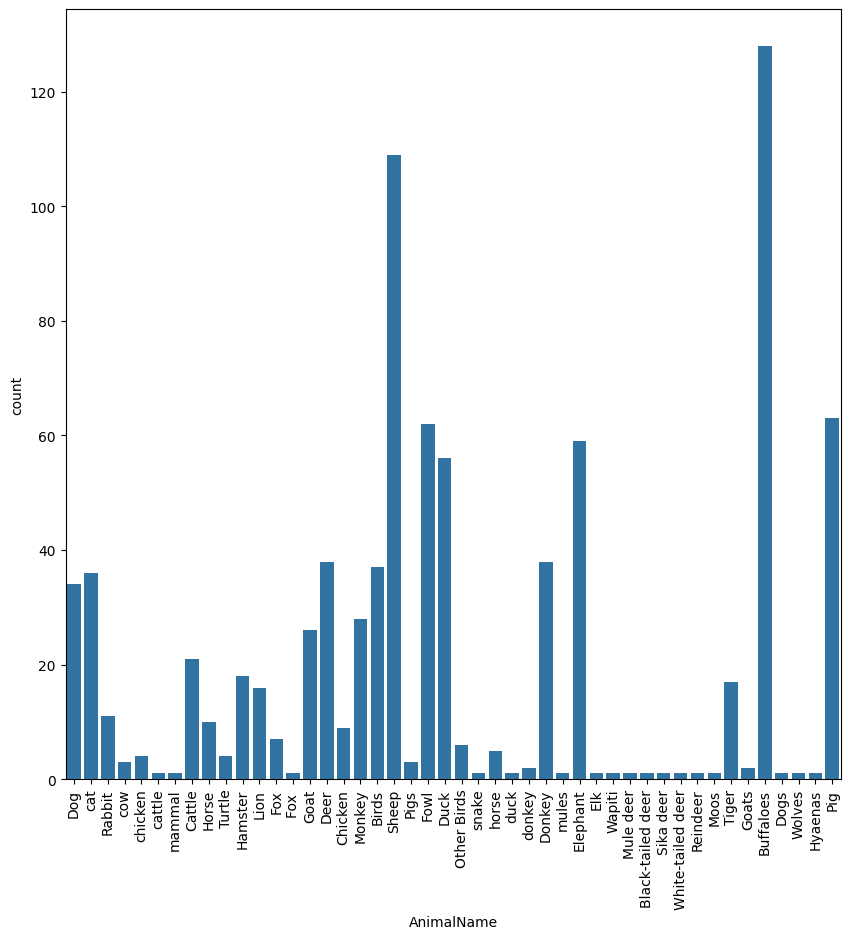

In [9]:
# plot the AnimalName counts

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(data_animal, x="AnimalName")

In [10]:
## just check the columns in the dataframe
data_animal.columns

Index(['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4',
       'symptoms5', 'Dangerous'],
      dtype='object')

In [11]:
data_animal.head(2)

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes


##  Intialize the LabelEncoder

In [12]:
## create the objects for encoding the labels and for the scaling the numerical data
labelencoder = LabelEncoder()

In [13]:
data_animal['AnimalName'] = labelencoder.fit_transform(data_animal['AnimalName'])
data_animal['symptoms1'] = labelencoder.fit_transform(data_animal['symptoms1'])
data_animal['symptoms2'] = labelencoder.fit_transform(data_animal['symptoms2'])
data_animal['symptoms3'] = labelencoder.fit_transform(data_animal['symptoms3'])
data_animal['symptoms4'] = labelencoder.fit_transform(data_animal['symptoms4'])
data_animal['symptoms5'] = labelencoder.fit_transform(data_animal['symptoms5'])
data_animal['Dangerous'] = labelencoder.fit_transform(data_animal['Dangerous'])

## Correlation Matrix

* As all of the columns are categorical correlation matrix does not apply to the data

In [14]:
# correlation_matrix = data_animal.corr()
# fig, ax_ = plt.subplots(figsize=(15, 10))
# ax_ = sns.heatmap(correlation_matrix, 
#                  annot=True,
#                  linewidths=0.5,
#                  fmt=".2f");

## Create the X and Y

In [15]:
# Yes 1, No 0
data_animal['Dangerous'].value_counts()

Dangerous
1    849
0     20
Name: count, dtype: int64

In [16]:
data_animal_X = data_animal.drop("Dangerous", axis = 1)
data_animal_Y = data_animal['Dangerous']

In [17]:
data_animal_X.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5
0,6,63,30,179,181,32
1,6,63,30,31,164,113
2,6,63,30,31,172,8
3,6,63,33,31,87,142
4,6,63,30,31,87,21


## Train-Test split

In [18]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_animal_X, data_animal_Y, test_size=0.25)

### Model Training using the below algoritms

1. Naïve Bayes
2. K-Nearest Neighbor (KNN)
3. Support Vector Machines (SVM)
4. Decision Trees (DT)
5. Logistic Regression (Logit)


In [19]:
names = [
         "Naive Bayes", 
         "Nearest Neighbors",
         "SVM",
         "Decision Tree", 
         "Logistic Regression",
        ]



classifiers = [
               GaussianNB(),
               KNeighborsClassifier(),
                SVC(),           
                DecisionTreeClassifier(),
                LogisticRegression()
                          ]

In [20]:
# # Evaluate the model and calculate model accuracy

model_dict_desc = {}
for name, clf in tqdm(zip(names, classifiers)):
    
    # traing
    clf.fit(data_x_train, data_y_train)
    y_pred = clf.predict(data_x_test)
    
 
    model_dict_desc[name] = [accuracy_score(data_y_test, y_pred),
                             precision_score(data_y_test, y_pred), 
                             recall_score(data_y_test.values, y_pred),
                             f1_score(data_y_test.values, y_pred)]

    print(f"\n{name} :")
    print("\nClassification report")
    print(classification_report(data_y_test.values, y_pred))
    
    print("\nConfusion matrix")
    print(confusion_matrix(data_y_test.values, y_pred), "\n\n\n")
    print('************************************************************')

5it [00:00, 19.32it/s]


Naive Bayes :

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.96      1.00      0.98       210

    accuracy                           0.96       218
   macro avg       0.48      0.50      0.49       218
weighted avg       0.93      0.96      0.95       218


Confusion matrix
[[  0   8]
 [  0 210]] 



************************************************************

Nearest Neighbors :

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.96      1.00      0.98       210

    accuracy                           0.96       218
   macro avg       0.48      0.50      0.49       218
weighted avg       0.93      0.96      0.95       218


Confusion matrix
[[  0   8]
 [  0 210]] 



************************************************************

SVM :

Classification report
              precisio

In [21]:
model_df_desc = pd.DataFrame(model_dict_desc, index = ['accuracy_score', 'precision_score', 'recall_score','f1_score']).T
model_df_desc = model_df_desc.sort_values(by=['f1_score','recall_score','accuracy_score'], ascending=False)
model_df_desc

,accuracy_score,precision_score,recall_score,f1_score
Decision Tree,0.967890,0.976526,0.990476,0.983452
Naive Bayes,0.963303,0.963303,1.000000,0.981308
Nearest Neighbors,0.963303,0.963303,1.000000,0.981308
SVM,0.963303,0.963303,1.000000,0.981308
Logistic Regression,0.963303,0.963303,1.000000,0.981308


## Read from the provided dataset

In [22]:
DATA_PATH='.'
data_churn=pd.read_csv(os.path.join(DATA_PATH,"Churn_Modelling.csv"))

In [23]:
## see the dataset
data_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
## get the info
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [25]:
## gives the statistics 
data_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [26]:
## gives the statistics 
data_churn.describe(include=['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [27]:
data_churn.groupby(["Exited", "Gender"]).agg({"Age": "mean"})

Age
Exited Gender           
0      Female  37.382491
       Male    37.427725
1      Female  44.784899
       Male    44.905345

In [28]:
data_churn.groupby(["Exited", "Gender"]).agg({"Tenure": "mean"})

Tenure
Exited Gender          
0      Female  4.977086
       Male    5.075236
1      Female  4.933275
       Male    4.932071

In [29]:
data_churn.groupby(["Exited", "Gender"]).agg({"Balance": "mean"})

Balance
Exited Gender              
0      Female  71183.249639
       Male    73911.607037
1      Female  89036.639359
       Male    93736.483742

In [30]:
data_churn.groupby(["Exited", "Gender"]).agg({"EstimatedSalary": "mean"})

EstimatedSalary
Exited Gender                 
0      Female     99816.071486
       Male       99680.391827
1      Female    102948.986093
       Male       99584.287272

In [31]:
data_churn.groupby("Gender").agg({"Age": "mean"})

,Age
Gender,
Female,39.238389
Male,38.658237


In [32]:
data_churn.groupby("Geography").agg({"Exited": "mean"})

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


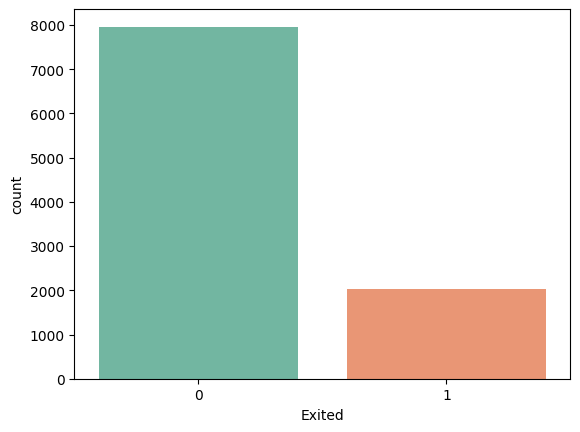

In [33]:
sns.countplot(x='Exited', data=data_churn,palette='Set2')
plt.show()

## check nan values

In [34]:
## we see that Dangerous column has nan values
data_churn.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Feature selection

* As these columns are not required to build the model we will drop the column RowNumber,CustomerId,Surname

In [35]:
data_churn.drop("RowNumber",axis = 1,inplace=True)
data_churn.drop("CustomerId",axis = 1,inplace=True)
data_churn.drop("Surname",axis = 1,inplace=True)

In [36]:
data_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## correlation matrix

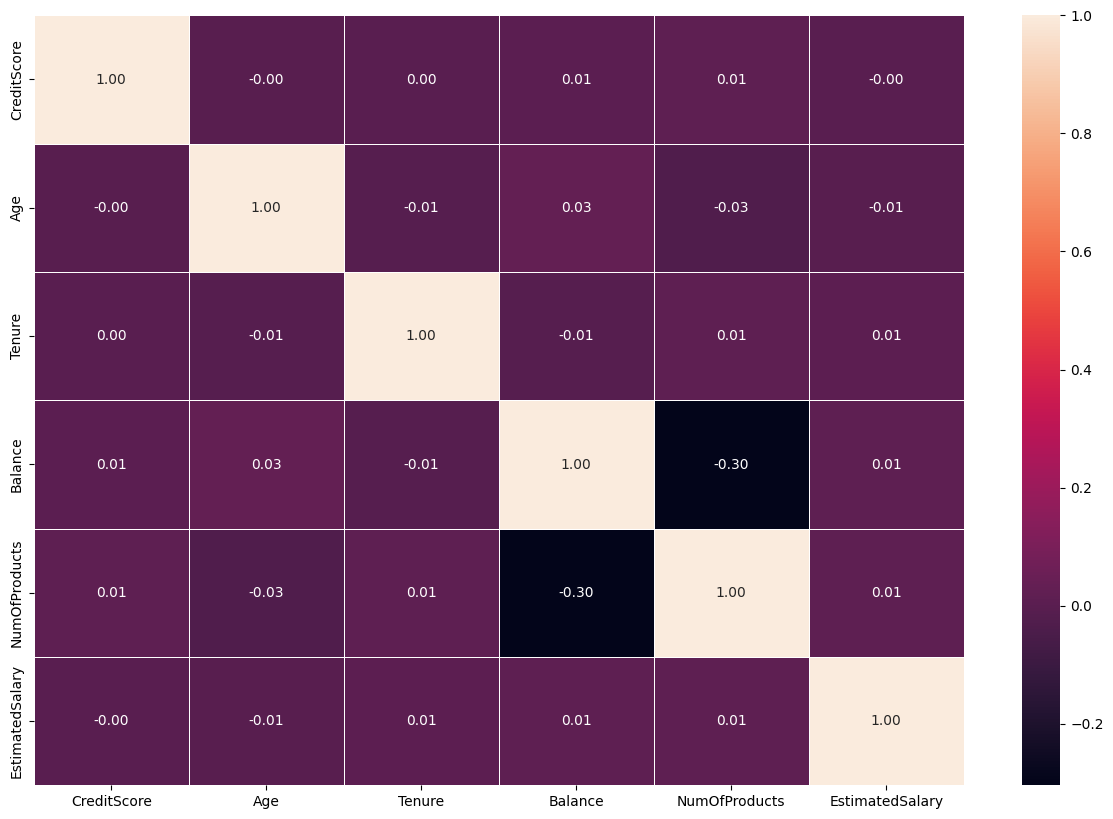

In [37]:
numerical_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
correlation_matrix = data_churn[numerical_columns].corr()
fig, ax_ = plt.subplots(figsize=(15, 10))
ax_ = sns.heatmap(correlation_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f");

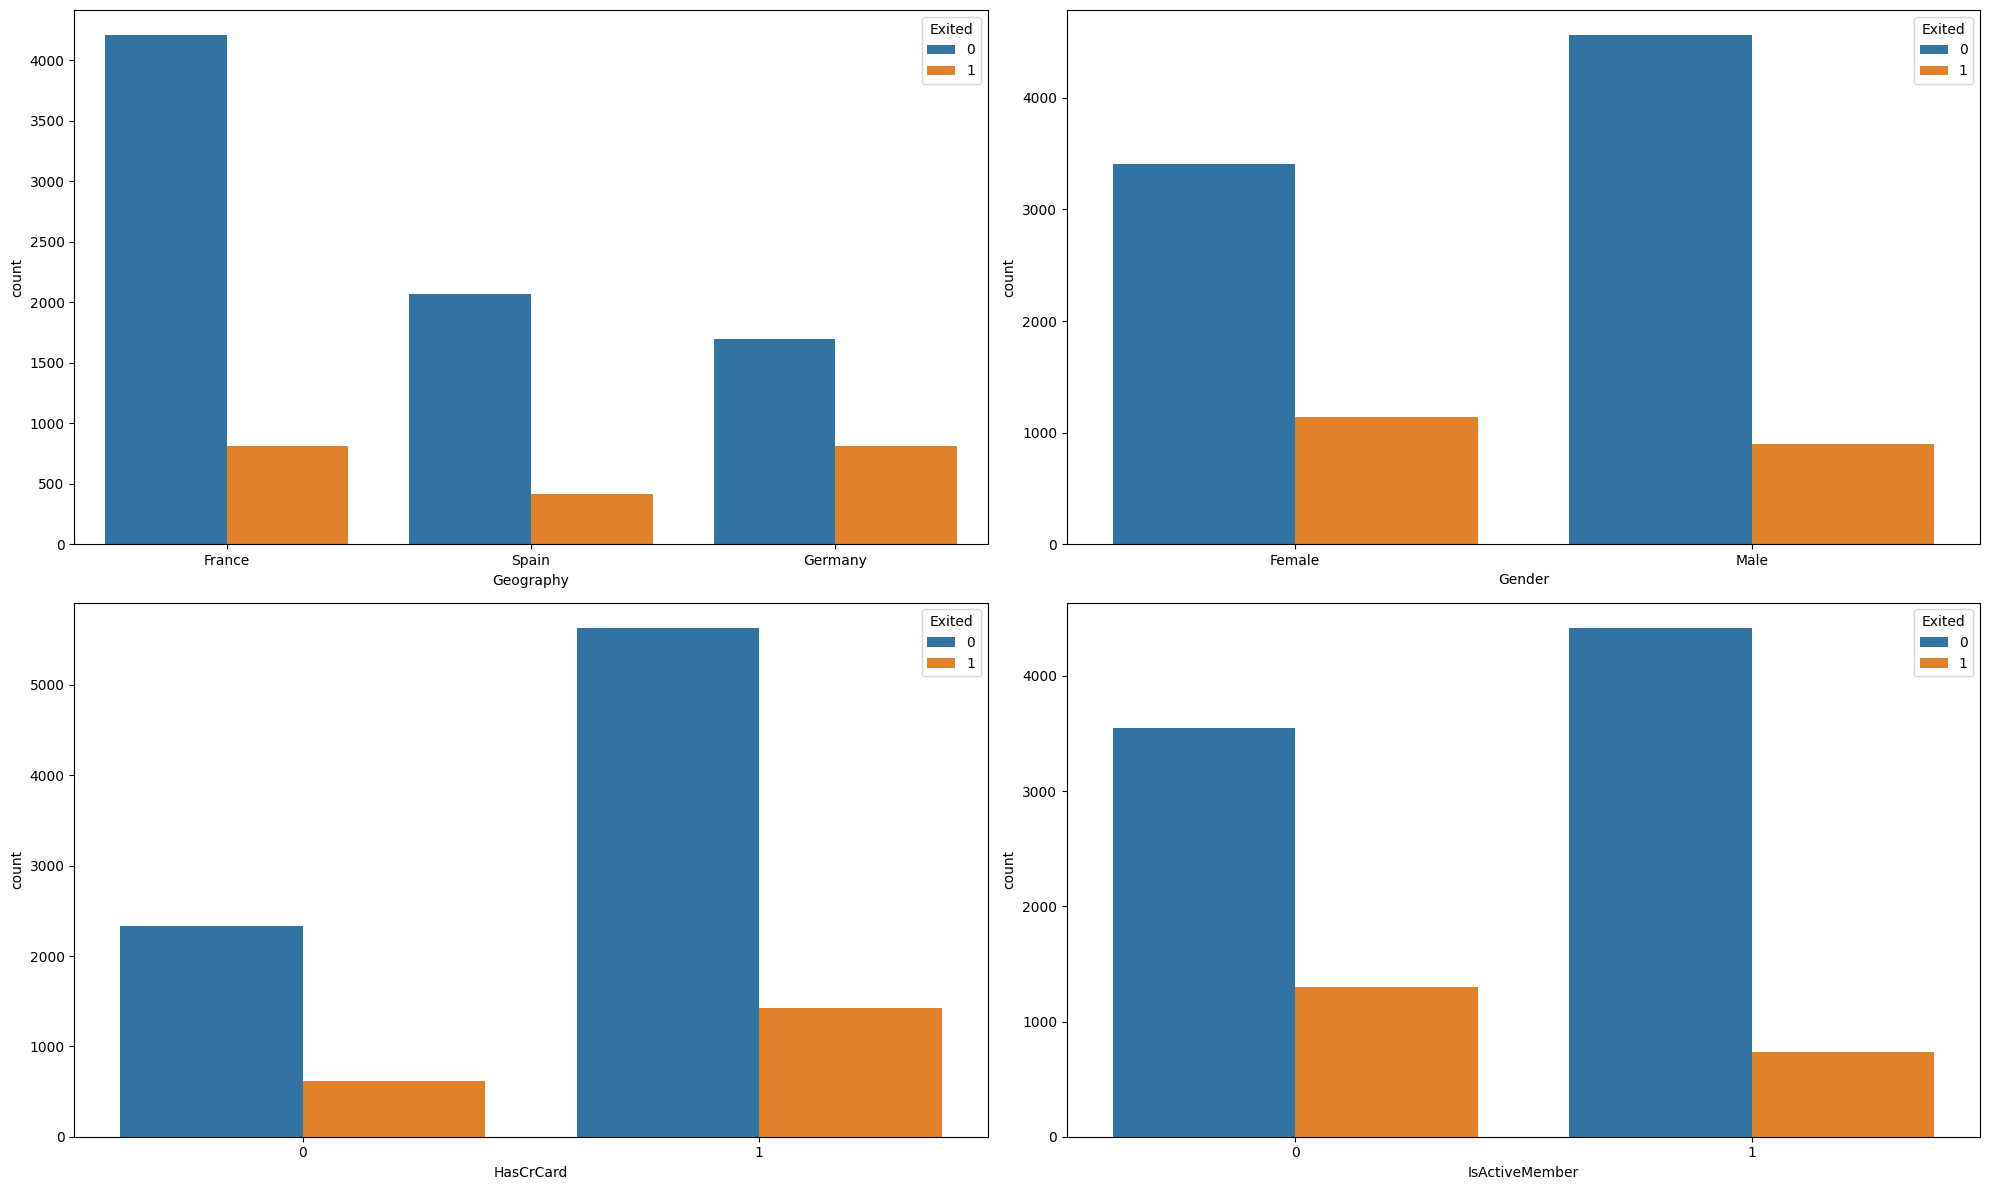

In [38]:

features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

for i, feature in enumerate(features):
    sns.countplot(x=feature, hue='Exited', data=data_churn, ax=axarr[i//2][i%2])

plt.tight_layout()
plt.show()


### Onehot encoding for Geography column

In [39]:
data_churn = pd.get_dummies(data_churn, columns=['Geography'], dtype=int)

In [40]:
data_churn['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## Intialize the labelencoder

In [41]:
## create the objects for encoding the labels and for the scaling the numerical data
labelencoder_datachurn = LabelEncoder()

In [42]:
data_churn['Gender'] = labelencoder_datachurn.fit_transform(data_churn['Gender'])

In [43]:
# Male 1, Female 0
data_churn['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

## create X and Y

In [44]:
data_churn_X=data_churn.drop("Exited",axis = 1)
data_churn_Y=data_churn["Exited"]

In [56]:
data_churn["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

## Intialize MinMax scaler and convert the value scale of the columns

In [45]:
min_maxscaler_datachurn = MinMaxScaler()
data_churn_X['CreditScore'] =  min_maxscaler_datachurn.fit_transform(data_churn_X[['CreditScore']])
data_churn_X['Age'] =  min_maxscaler_datachurn.fit_transform(data_churn_X[['Age']])
data_churn_X['Tenure'] =  min_maxscaler_datachurn.fit_transform(data_churn_X[['Tenure']])
data_churn_X['Balance'] =  min_maxscaler_datachurn.fit_transform(data_churn_X[['Balance']])
data_churn_X['NumOfProducts'] =  min_maxscaler_datachurn.fit_transform(data_churn_X[['NumOfProducts']])
data_churn_X['EstimatedSalary'] =  min_maxscaler_datachurn.fit_transform(data_churn_X[['EstimatedSalary']])

## Train-Test Split

In [46]:
X_train, X_test, y_train,y_test = train_test_split(data_churn_X, data_churn_Y, test_size=0.25)

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 12) (2500, 12) (7500,) (2500,)


### Model Training using the below algoritms

1. Naïve Bayes
2. K-Nearest Neighbor (KNN)
3. Support Vector Machines (SVM)
4. Decision Trees (DT)
5. Logistic Regression (Logit)


In [48]:
names = [
         "Naive Bayes", 
         "Nearest Neighbors",
         "SVM",
         "Linear SVM",
         "Decision Tree", 
         "Logistic Regression",
        ]



classifiers = [
               GaussianNB(),
               KNeighborsClassifier(),
                SVC(),   
                LinearSVC(),
                DecisionTreeClassifier(),
                LogisticRegression()
                          ]

In [49]:
# # Evaluate the model and calculate model accuracy

model_dict_desc = {}
for name, clf in tqdm(zip(names, classifiers)):
    
    # traing
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
 
    model_dict_desc[name] = [accuracy_score(y_test, y_pred),
                             precision_score(y_test, y_pred), 
                             recall_score(y_test.values, y_pred),
                             f1_score(y_test.values, y_pred)]

    print(f"\n{name} :")
    print("\nClassification report")
    print(classification_report(y_test.values, y_pred))
    
    print("\nConfusion matrix")
    print(confusion_matrix(y_test.values, y_pred), "\n\n\n")
    print('************************************************************')

1it [00:00,  8.92it/s]


Naive Bayes :

Classification report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1989
           1       0.62      0.36      0.46       511

    accuracy                           0.82      2500
   macro avg       0.73      0.65      0.68      2500
weighted avg       0.80      0.82      0.81      2500


Confusion matrix
[[1873  116]
 [ 325  186]] 



************************************************************


2it [00:00,  3.74it/s]


Nearest Neighbors :

Classification report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1989
           1       0.61      0.34      0.43       511

    accuracy                           0.82      2500
   macro avg       0.73      0.64      0.66      2500
weighted avg       0.80      0.82      0.80      2500


Confusion matrix
[[1879  110]
 [ 339  172]] 



************************************************************


4it [00:03,  1.19it/s]


SVM :

Classification report
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1989
           1       0.84      0.26      0.40       511

    accuracy                           0.84      2500
   macro avg       0.84      0.63      0.65      2500
weighted avg       0.84      0.84      0.80      2500


Confusion matrix
[[1964   25]
 [ 376  135]] 



************************************************************

Linear SVM :

Classification report
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1989
           1       0.68      0.13      0.22       511

    accuracy                           0.81      2500
   macro avg       0.75      0.56      0.56      2500
weighted avg       0.79      0.81      0.75      2500


Confusion matrix
[[1957   32]
 [ 443   68]] 



************************************************************


6it [00:03,  1.82it/s]


Decision Tree :

Classification report
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1989
           1       0.47      0.50      0.48       511

    accuracy                           0.78      2500
   macro avg       0.67      0.68      0.67      2500
weighted avg       0.79      0.78      0.79      2500


Confusion matrix
[[1704  285]
 [ 257  254]] 



************************************************************

Logistic Regression :

Classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1989
           1       0.64      0.19      0.29       511

    accuracy                           0.81      2500
   macro avg       0.73      0.58      0.59      2500
weighted avg       0.79      0.81      0.77      2500


Confusion matrix
[[1935   54]
 [ 414   97]] 



************************************************************


In [50]:
model_df_desc = pd.DataFrame(model_dict_desc, index = ['accuracy_score', 'precision_score', 'recall_score','f1_score']).T
model_df_desc = model_df_desc.sort_values(by=['f1_score','recall_score','accuracy_score'], ascending=False)
model_df_desc

,accuracy_score,precision_score,recall_score,f1_score
Decision Tree,0.7832,0.471243,0.497065,0.483810
Naive Bayes,0.8236,0.615894,0.363992,0.457565
Nearest Neighbors,0.8204,0.609929,0.336595,0.433796
SVM,0.8396,0.843750,0.264188,0.402385
Logistic Regression,0.8128,0.642384,0.189824,0.293051
Linear SVM,0.8100,0.680000,0.133072,0.222586


### Fixing the data imbalance issue

In [51]:
smk = SMOTE()
X_train, y_train = smk.fit_resample(X_train, y_train)

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11948, 12) (2500, 12) (11948,) (2500,)


In [53]:
# # Evaluate the model and calculate model accuracy

model_dict_desc = {}
for name, clf in tqdm(zip(names, classifiers)):
    
    # traing
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
 
    model_dict_desc[name] = [accuracy_score(y_test, y_pred),
                             precision_score(y_test, y_pred), 
                             recall_score(y_test.values, y_pred),
                             f1_score(y_test.values, y_pred)]

    print(f"\n{name} :")
    print("\nClassification report")
    print(classification_report(y_test.values, y_pred))
    
    print("\nConfusion matrix")
    print(confusion_matrix(y_test.values, y_pred), "\n\n\n")
    print('************************************************************')

0it [00:00, ?it/s]


Naive Bayes :

Classification report
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1989
           1       0.41      0.65      0.51       511

    accuracy                           0.74      2500
   macro avg       0.65      0.71      0.66      2500
weighted avg       0.80      0.74      0.76      2500


Confusion matrix
[[1515  474]
 [ 178  333]] 



************************************************************


2it [00:00,  2.59it/s]


Nearest Neighbors :

Classification report
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1989
           1       0.40      0.67      0.50       511

    accuracy                           0.72      2500
   macro avg       0.65      0.70      0.65      2500
weighted avg       0.79      0.72      0.75      2500


Confusion matrix
[[1467  522]
 [ 169  342]] 



************************************************************


3it [00:10,  4.19s/it]


SVM :

Classification report
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1989
           1       0.48      0.72      0.58       511

    accuracy                           0.79      2500
   macro avg       0.70      0.76      0.72      2500
weighted avg       0.83      0.79      0.80      2500


Confusion matrix
[[1597  392]
 [ 144  367]] 



************************************************************


5it [00:10,  1.82s/it]


Linear SVM :

Classification report
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1989
           1       0.40      0.71      0.51       511

    accuracy                           0.72      2500
   macro avg       0.65      0.72      0.66      2500
weighted avg       0.80      0.72      0.74      2500


Confusion matrix
[[1438  551]
 [ 148  363]] 



************************************************************

Decision Tree :

Classification report
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1989
           1       0.46      0.57      0.51       511

    accuracy                           0.78      2500
   macro avg       0.67      0.70      0.68      2500
weighted avg       0.80      0.78      0.78      2500


Confusion matrix
[[1651  338]
 [ 222  289]] 



************************************************************


6it [00:10,  1.80s/it]


Logistic Regression :

Classification report
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1989
           1       0.39      0.71      0.51       511

    accuracy                           0.72      2500
   macro avg       0.65      0.72      0.65      2500
weighted avg       0.80      0.72      0.74      2500


Confusion matrix
[[1426  563]
 [ 146  365]] 



************************************************************


In [54]:
model_df_desc = pd.DataFrame(model_dict_desc, index = ['accuracy_score', 'precision_score', 'recall_score','f1_score']).T
model_df_desc = model_df_desc.sort_values(by=['f1_score','recall_score','accuracy_score'], ascending=False)
model_df_desc

,accuracy_score,precision_score,recall_score,f1_score
SVM,0.7856,0.483531,0.718200,0.577953
Linear SVM,0.7204,0.397155,0.710372,0.509474
Decision Tree,0.7760,0.460925,0.565558,0.507909
Logistic Regression,0.7164,0.393319,0.714286,0.507297
Naive Bayes,0.7392,0.412639,0.651663,0.505311
Nearest Neighbors,0.7236,0.395833,0.669276,0.497455


* Overall here the accuracy decreases but the all the other metrics got increased.

# Feature importance 

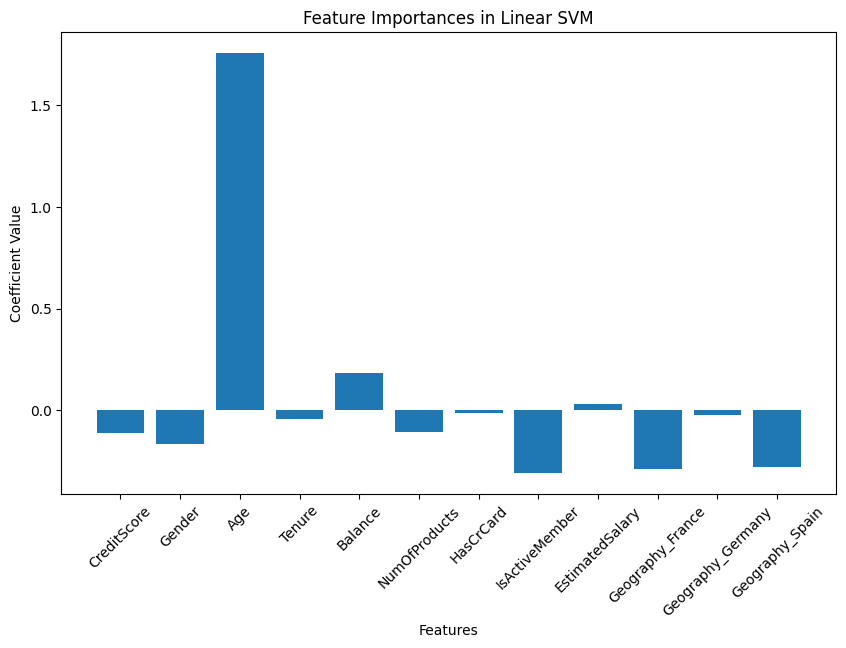

In [55]:

feature_names = data_churn_X.columns

# Training a Linear SVM
svm_model = LinearSVC(random_state=0)
svm_model.fit(data_churn_X, data_churn_Y)

# Extracting coefficients
coefficients = svm_model.coef_[0]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importances in Linear SVM')
plt.xticks(rotation=45)
plt.show()


* Interpretation :

    * From the figure we know that Age, Balance has the most positive effect for being existed.